In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

ch1 = pd.read_csv("Input Files\F0000CH1.CSV")
ch2 = pd.read_csv("Input Files\F0000CH2.CSV")

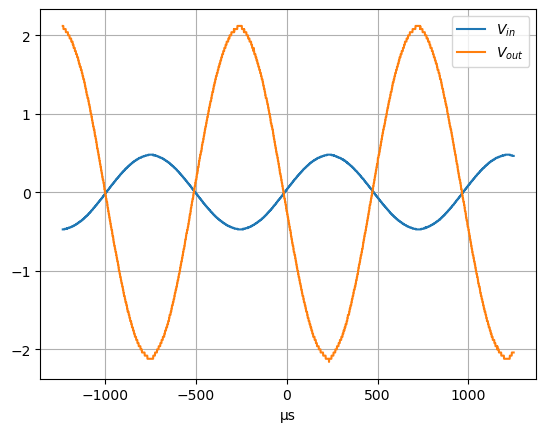

In [7]:
Vin  = np.array(ch1["CH1"])
Vout = np.array(ch2["CH2"])
t    = np.array(ch1["time"])*1e6        # Sample rate of 1 us
####
plt.plot(t, Vin)
plt.plot(t, Vout)
####
plt.legend(["$V_{in}$", "$V_{out}$"])
plt.xlabel("μs")
plt.grid()
plt.show()

In [3]:
print("Vin PP: ", np.max(Vin)-np.min(Vin), "V")     # Pelo osciloscópio: 960  mV
print("Vout PP: ", np.max(Vout)-np.min(Vout), "V")  # Pelo osciloscópio: 4.28  V

Vin PP:  0.952 V
Vout PP:  4.28 V


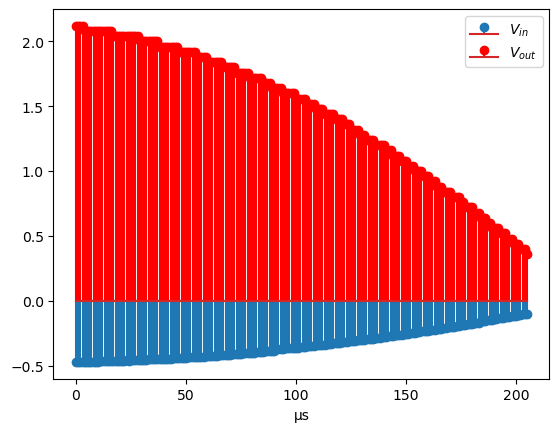

In [4]:
plt.stem(Vin[:len(Vin)//12])
plt.stem(Vout[:len(Vout)//12], 'r')
####
plt.legend(["$V_{in}$", "$V_{out}$"])
plt.xlabel("μs")
plt.show()

In [5]:
np.average(np.divide(Vout, Vin, where=np.abs(Vin)>1e-6))

-4.400595835825565

In [6]:
t_vinmax = t[Vin==np.max(Vin)]
t_vinmax = t_vinmax[len(t_vinmax)//2]

t_voutmax = t[Vout==np.max(Vout)]
t_voutmax = t_voutmax[len(t_voutmax)//2]

# Diferença entre os picos
dt = t_voutmax - t_vinmax
tp = t[Vin==np.max(Vin)]            # Tempos de pico (us)
T  = np.abs(tp[0] - tp[tp>0][0])    # Período de um ciclo (us)
f  = 1e6/T                          # Frequência (Hz)
f

1018.3299389002036

c:\Users\emanuel\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


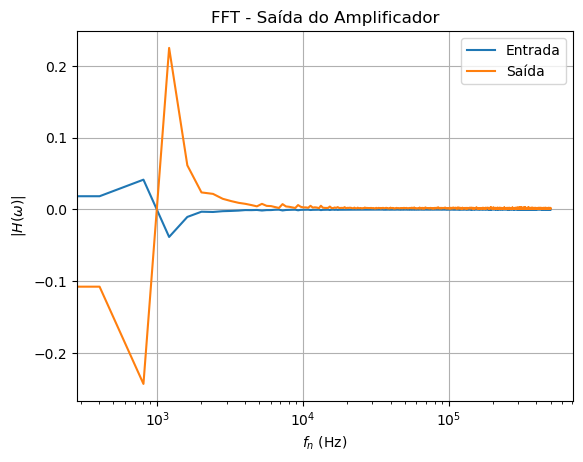

In [29]:
import scipy as sp

N = len(Vout)
T = (t[1]-t[0])*1e-6

Hout = (2.0/N) * (sp.fft.fft(Vout)[0:N//2])
Hin  = (2.0/N) * (sp.fft.fft(Vin)[0:N//2])
w    = sp.fft.fftfreq(N, T)[:N//2]

plt.plot(w, Hin, label="Entrada")
plt.plot(w, Hout, label="Saída")
plt.xlabel("$f_n$ (Hz)")
plt.ylabel("$|H(\omega)|$")
plt.title("FFT - Saída do Amplificador")
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()